In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import KDE_Synth_Data_Gen as KDESynth

In [5]:
data = pd.read_csv('final.csv', usecols= ['anchor_age','ART BP Systolic','Heart Rate', 'O2 saturation pulseoxymetry', 'Respiratory Rate', 'Temperature Celsius', 'GCS Total']) # Full datasets

#data = data = pd.read_csv('final.csv', usecols= ['anchor_age','Heart Rate', 'O2 saturation pulseoxymetry', 'Respiratory Rate']) # Columns with fewest NaN values

# Drop outliers in the O2 Saturation pulseoxymetry column
data = data[(data['O2 saturation pulseoxymetry'] != 811100.0) & (data['O2 saturation pulseoxymetry'] != 9795.0)]


In [6]:
# Pick if you want data sample independently or multi-variate
#syn_data = KDESynth.generate_kde_indep(data, sample_num=10000) # Independent sampling

syn_data = KDESynth.generate_kde_multi(data, sample_num=10000) # Multi-variate sampling

syn_data.head()

,anchor_age,ART BP Systolic,Heart Rate,O2 saturation pulseoxymetry,Respiratory Rate,Temperature Celsius,GCS Total
0,72.896492,NaN,110.640580,103.116038,19.238203,35.180863,13.224741
1,80.471102,NaN,70.411686,96.208120,18.668764,NaN,9.179875
2,88.779759,NaN,57.305845,100.359154,15.866334,NaN,4.538903
3,48.045314,NaN,78.207550,99.009254,31.288712,NaN,2.693633
4,54.601806,NaN,95.498466,99.505330,22.625464,NaN,4.259673


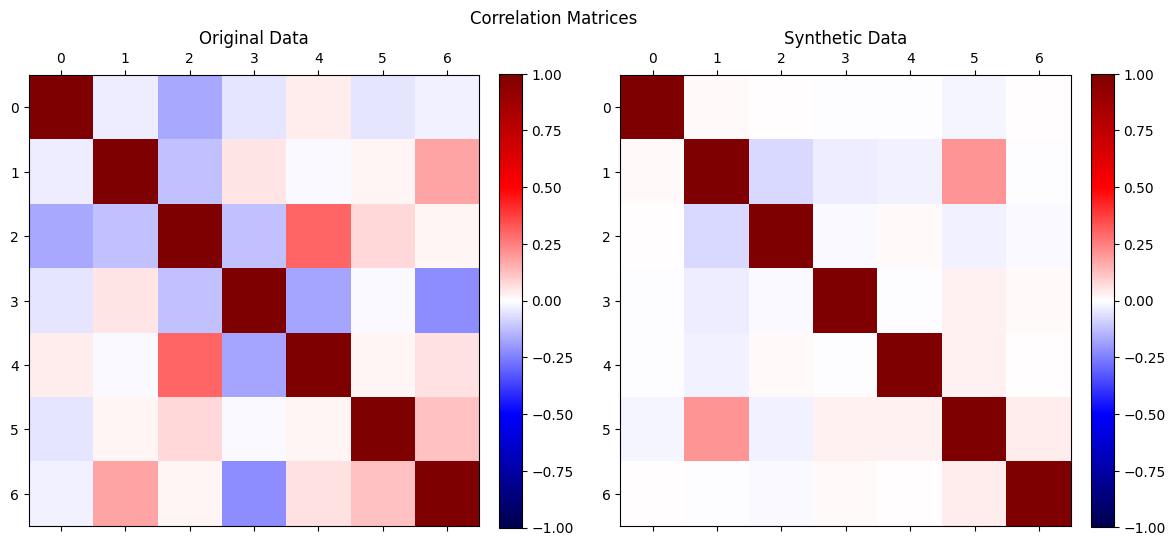

In [4]:
# Indepenednt sampling
fig, axs = plt.subplots(1 , 2, figsize = (14, 6))

# Plotting the correlation matrix of the original data
cax1 = axs[0].matshow(data.corr(), cmap = 'seismic', vmin = -1, vmax = 1)
fig.colorbar(cax1, ax = axs[0], fraction = 0.046, pad = 0.04)
axs[0].set_title('Original Data')

# Plotting the correlation matrix of the synthetic data 
cax2 = axs[1].matshow(syn_data.corr(), cmap = 'seismic', vmin = -1, vmax = 1)
fig.colorbar(cax2, ax = axs[1], fraction = 0.046, pad = 0.04)
axs[1].set_title('Synthetic Data')

# Adding a main title for the entire figure
plt.suptitle('Correlation Matrices')

plt.show()

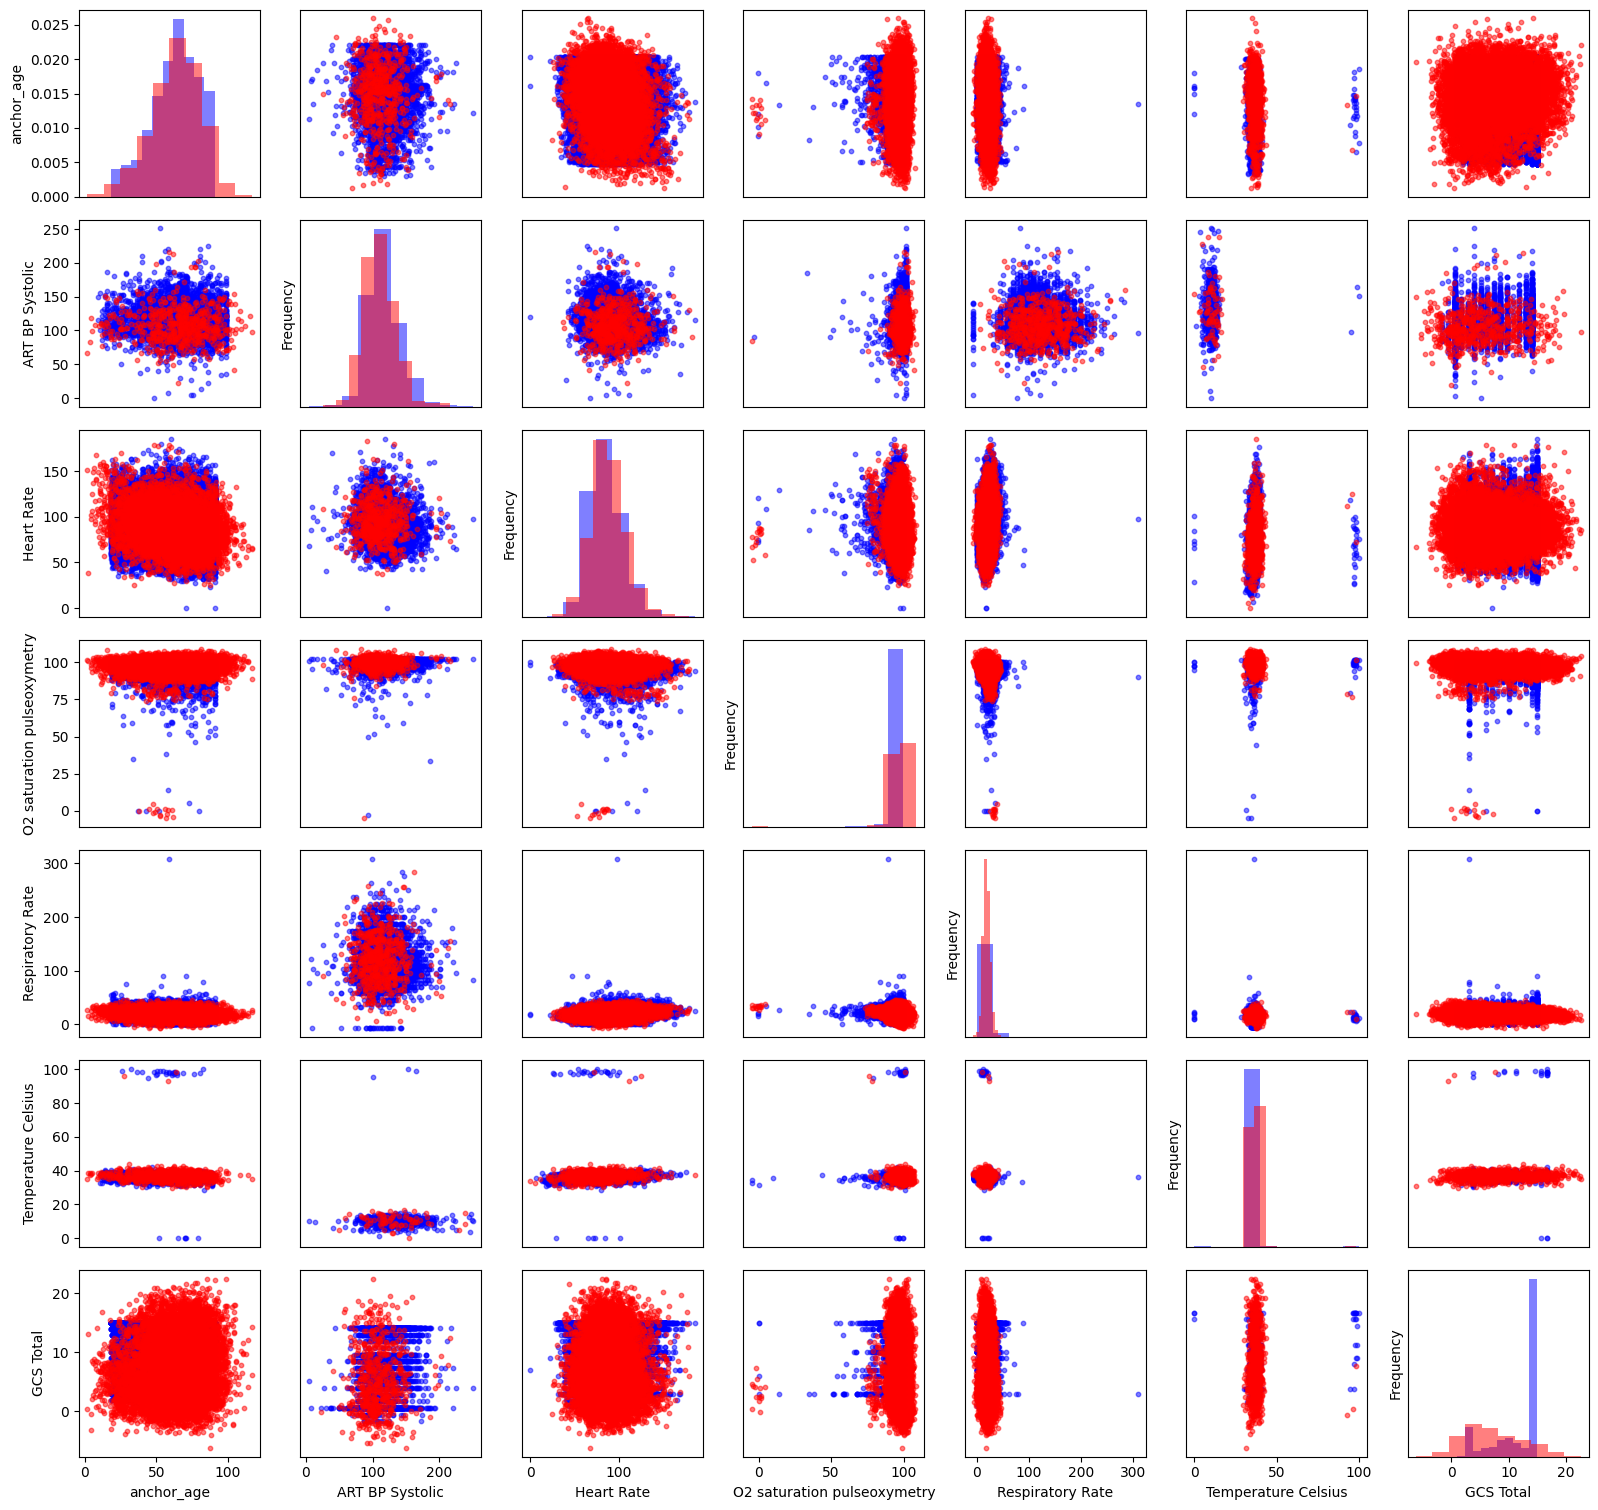

In [7]:
# Mutli-variate sampling

# Assuming 'data' and 'syn_data' are your dataframes
columns = data.columns # Assuming both dataframes have the same columns
n= len(columns)
fig, axs = plt.subplots(n, n, figsize = (16, 16), squeeze = False)

for i in range(n):
    for j in range (n):
        ax = axs[i, j]
        if i == j:
            # Diagonal: Plot histograms
            data[columns[i]].plot(kind = 'hist', ax = ax, color = 'blue', alpha=0.5, density=True)
            syn_data[columns[i]].plot(kind = 'hist', ax = ax, color = 'red', alpha=0.5, density=True)

        else:
            # Off-diagonal: Plot scatter
            ax.scatter(data[columns[j]], data[columns[i]], alpha=0.5, color='blue', s=10)
            ax.scatter(syn_data[columns[j]], syn_data[columns[i]], alpha=0.5, color='red', s=10)

        # Hide axis label and ticks if not on the edge
        if i < n - 1: ax.set_xticks([])
        if j > 0: ax.set_yticks([])
        if j == 0: ax.set_ylabel(columns[i])
        if i == n - 1: ax.set_xlabel(columns[j])

# Adjust layout to make room for the legend
plt.tight_layout(rect = [0, 0, 1, 0.95])

plt.show()